In [1]:
!pip install keras_preprocessing

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 2.9 MB/s eta 0:00:00


In [2]:
import os
import zipfile
import urllib.request
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import Xception
from tensorflow.keras.models import Model
from tensorflow.keras import layers
from tensorflow.keras.optimizers import Adam

In [3]:
# Download & Ekstrak Dataset
data_url = 'https://drive.usercontent.google.com/download?id=1T2vteOAvBrj23MK3ry_ynLWli4_gNbqe&export=download&confirm=t'
urllib.request.urlretrieve(data_url, 'Datasets.zip')
zip_ref = zipfile.ZipFile('Datasets.zip', 'r')
zip_ref.extractall('Datasets')
zip_ref.close()

base_dir = 'Datasets'
train_path = os.path.join(base_dir, 'Dataset/train')
val_path = os.path.join(base_dir, 'Dataset/validation')
test_path = os.path.join(base_dir, 'Dataset/test')

In [4]:
# ImageDataGenerator (Augmentasi & Preprocessing)
train_datagen = ImageDataGenerator(
    rescale=1.0/255.0,
    rotation_range=30,
    width_shift_range=0.3,
    height_shift_range=0.2,
    shear_range=0.3,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

train_generator = train_datagen.flow_from_directory(
    train_path, target_size=(299, 299), batch_size=128, class_mode='categorical'
)

val_datagen = ImageDataGenerator(rescale=1.0/255.0)
validation_generator = val_datagen.flow_from_directory(
    val_path, target_size=(299, 299), batch_size=128, class_mode='categorical'
)

test_datagen = ImageDataGenerator(rescale=1.0/255.0)
test_generator = test_datagen.flow_from_directory(
    test_path, target_size=(299, 299), batch_size=128, class_mode='categorical'
)

Found 1062 images belonging to 3 classes.
Found 298 images belonging to 3 classes.
Found 150 images belonging to 3 classes.


In [5]:
# Load Xception Pretrained Model
base_model = Xception(input_shape=(299, 299, 3), include_top=False, weights='imagenet')
for layer in base_model.layers:
    layer.trainable = False
last_output = base_model.output

83683744/83683744 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [6]:
# Tambahkan Fully Connected Layer & Train
x = layers.GlobalAveragePooling2D()(last_output)
x = layers.Dense(128, activation='relu')(x)
x = layers.Dropout(0.2)(x)
x = layers.Dense(64, activation='relu')(x)
x = layers.Dropout(0.1)(x)
x = layers.Dense(3, activation='softmax')(x)

model = Model(base_model.input, x)
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['acc'])

checkpoint = tf.keras.callbacks.ModelCheckpoint('Xception_model.h5', monitor='val_acc', save_best_only=True)

history = model.fit(train_generator, epochs=100, validation_data=validation_generator, callbacks=[checkpoint])


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5s/step - acc: 0.4080 - loss: 1.0877

9/9 ━━━━━━━━━━━━━━━━━━━━ 118s 8s/step - acc: 0.4140 - loss: 1.0837 - val_acc: 0.6107 - val_loss: 0.8852
Epoch 2/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - acc: 0.5818 - loss: 0.8782

9/9 ━━━━━━━━━━━━━━━━━━━━ 68s 4s/step - acc: 0.5842 - loss: 0.8746 - val_acc: 0.6544 - val_loss: 0.7407
Epoch 3/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - acc: 0.6577 - loss: 0.7519

9/9 ━━━━━━━━━━━━━━━━━━━━ 40s 4s/step - acc: 0.6589 - loss: 0.7506 - val_acc: 0.7047 - val_loss: 0.6686
Epoch 4/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - acc: 0.6940 - loss: 0.6861

9/9 ━━━━━━━━━━━━━━━━━━━━ 39s 5s/step - acc: 0.6947 - loss: 0.6851 - val_acc: 0.7383 - val_loss: 0.6205
Epoch 5/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - acc: 0.7414 - loss: 0.6391

9/9 ━━━━━━━━━━━━━━━━━━━━ 38s 4s/step - acc: 0.7423 - loss: 0.6369 - val_acc: 0.7617 - val_loss: 0.6062
Epoch 6/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - acc: 0.7122 - loss: 0.6555

9/9 ━━━━━━━━━━━━━━━━━━━━ 39s 5s/step - acc: 0.7129 - loss: 0.6536 - val_acc: 0.7685 - val_loss: 0.5780
Epoch 7/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 38s 4s/step - acc: 0.7246 - loss: 0.6440 - val_acc: 0.7517 - val_loss: 0.5594
Epoch 8/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 40s 4s/step - acc: 0.7390 - loss: 0.6019 - val_acc: 0.7651 - val_loss: 0.5641
Epoch 9/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - acc: 0.7455 - loss: 0.5945

9/9 ━━━━━━━━━━━━━━━━━━━━ 38s 4s/step - acc: 0.7449 - loss: 0.5949 - val_acc: 0.7785 - val_loss: 0.5372
Epoch 10/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 38s 4s/step - acc: 0.7148 - loss: 0.6050 - val_acc: 0.7785 - val_loss: 0.5354
Epoch 11/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - acc: 0.7922 - loss: 0.5190

9/9 ━━━━━━━━━━━━━━━━━━━━ 38s 4s/step - acc: 0.7894 - loss: 0.5229 - val_acc: 0.7852 - val_loss: 0.5277
Epoch 12/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - acc: 0.7695 - loss: 0.5415

9/9 ━━━━━━━━━━━━━━━━━━━━ 39s 5s/step - acc: 0.7683 - loss: 0.5449 - val_acc: 0.7987 - val_loss: 0.5014
Epoch 13/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 38s 4s/step - acc: 0.7441 - loss: 0.5522 - val_acc: 0.7819 - val_loss: 0.4918
Epoch 14/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 38s 4s/step - acc: 0.7672 - loss: 0.5189 - val_acc: 0.7886 - val_loss: 0.4850
Epoch 15/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 39s 4s/step - acc: 0.7754 - loss: 0.4992 - val_acc: 0.7852 - val_loss: 0.4926
Epoch 16/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 38s 4s/step - acc: 0.7982 - loss: 0.4867 - val_acc: 0.7785 - val_loss: 0.5182
Epoch 17/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 38s 5s/step - acc: 0.7898 - loss: 0.5318 - val_acc: 0.7617 - val_loss: 0.5025
Epoch 18/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 39s 5s/step - acc: 0.7977 - loss: 0.5148 - val_acc: 0.7685 - val_loss: 0.5127
Epoch 19/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 38s 4s/step - acc: 0.7679 - loss: 0.5133 - val_acc: 0.7819 - val_loss: 0.5158
Epoch 20/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 38s 4s/step - acc: 0.7860 - loss: 0.4876 - val_

9/9 ━━━━━━━━━━━━━━━━━━━━ 39s 4s/step - acc: 0.8248 - loss: 0.4341 - val_acc: 0.8154 - val_loss: 0.5009
Epoch 37/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 39s 4s/step - acc: 0.8135 - loss: 0.4391 - val_acc: 0.8121 - val_loss: 0.4713
Epoch 38/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 39s 4s/step - acc: 0.8291 - loss: 0.3936 - val_acc: 0.7852 - val_loss: 0.4753
Epoch 39/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 38s 4s/step - acc: 0.8256 - loss: 0.4251 - val_acc: 0.7718 - val_loss: 0.4830
Epoch 40/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 39s 4s/step - acc: 0.8379 - loss: 0.4382 - val_acc: 0.7819 - val_loss: 0.4865
Epoch 41/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 38s 4s/step - acc: 0.8351 - loss: 0.3995 - val_acc: 0.7685 - val_loss: 0.5051
Epoch 42/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 39s 4s/step - acc: 0.8299 - loss: 0.4138 - val_acc: 0.7987 - val_loss: 0.4820
Epoch 43/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 39s 4s/step - acc: 0.8341 - loss: 0.3768 - val_acc: 0.8087 - val_loss: 0.4685
Epoch 44/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 38s 4s/step - acc: 0.8285 - loss: 0.4052 - val_

9/9 ━━━━━━━━━━━━━━━━━━━━ 38s 4s/step - acc: 0.8693 - loss: 0.3230 - val_acc: 0.8188 - val_loss: 0.4976
Epoch 83/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 38s 4s/step - acc: 0.8391 - loss: 0.3601 - val_acc: 0.7987 - val_loss: 0.4850
Epoch 84/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - acc: 0.8867 - loss: 0.3143

9/9 ━━━━━━━━━━━━━━━━━━━━ 39s 4s/step - acc: 0.8865 - loss: 0.3151 - val_acc: 0.8322 - val_loss: 0.5171
Epoch 85/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 38s 4s/step - acc: 0.8679 - loss: 0.3504 - val_acc: 0.7886 - val_loss: 0.5455
Epoch 86/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 38s 4s/step - acc: 0.8868 - loss: 0.3114 - val_acc: 0.7852 - val_loss: 0.5410
Epoch 87/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 38s 4s/step - acc: 0.8635 - loss: 0.3303 - val_acc: 0.8020 - val_loss: 0.5295
Epoch 88/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 38s 4s/step - acc: 0.8761 - loss: 0.3004 - val_acc: 0.8054 - val_loss: 0.5793
Epoch 89/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 40s 4s/step - acc: 0.8733 - loss: 0.3216 - val_acc: 0.8255 - val_loss: 0.5270
Epoch 90/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 38s 4s/step - acc: 0.8852 - loss: 0.3029 - val_acc: 0.7987 - val_loss: 0.5606
Epoch 91/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 38s 4s/step - acc: 0.8500 - loss: 0.3422 - val_acc: 0.8154 - val_loss: 0.5494
Epoch 92/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 38s 4s/step - acc: 0.8853 - loss: 0.2768 - val_

In [7]:
train_path = os.path.join(base_dir, "Dataset/train")
val_path = os.path.join(base_dir, "Dataset/validation")
test_path = os.path.join(base_dir, "Dataset/test")

train_datagen = ImageDataGenerator(rescale=1.0 / 255.0)
train_generator = train_datagen.flow_from_directory(
    train_path,
    target_size=(299, 299),
    batch_size=128,
    class_mode='categorical'
)

validation_datagen = ImageDataGenerator(rescale=1.0 / 255.0)
validation_generator = validation_datagen.flow_from_directory(
    val_path,
    target_size=(299, 299),
    batch_size=128,
    class_mode='categorical'
)

test_datagen = ImageDataGenerator(rescale=1.0 / 255.0)
test_generator = test_datagen.flow_from_directory(
    test_path,
    target_size=(299, 299),
    batch_size=128,
    class_mode='categorical'
)

model = tf.keras.models.load_model('Xception_model.h5')

train_loss, train_acc = model.evaluate(train_generator, verbose=1)
val_loss, val_acc = model.evaluate(validation_generator, verbose=1)
test_loss, test_acc = model.evaluate(test_generator, verbose=1)

print(f"Train Accuracy: {train_acc:.4f}, Loss: {train_loss:.4f}")
print(f"Validation Accuracy: {val_acc:.4f}, Loss: {val_loss:.4f}")
print(f"Test Accuracy: {test_acc:.4f}, Loss: {test_loss:.4f}")

Found 1062 images belonging to 3 classes.
Found 298 images belonging to 3 classes.
Found 150 images belonging to 3 classes.


9/9 ━━━━━━━━━━━━━━━━━━━━ 21s 2s/step - acc: 0.8541 - loss: 0.3429
3/3 ━━━━━━━━━━━━━━━━━━━━ 6s 2s/step - acc: 0.8214 - loss: 0.5629
2/2 ━━━━━━━━━━━━━━━━━━━━ 13s 10s/step - acc: 0.7600 - loss: 0.6232
Train Accuracy: 0.8578, Loss: 0.3308
Validation Accuracy: 0.8322, Loss: 0.5171
Test Accuracy: 0.7533, Loss: 0.6237


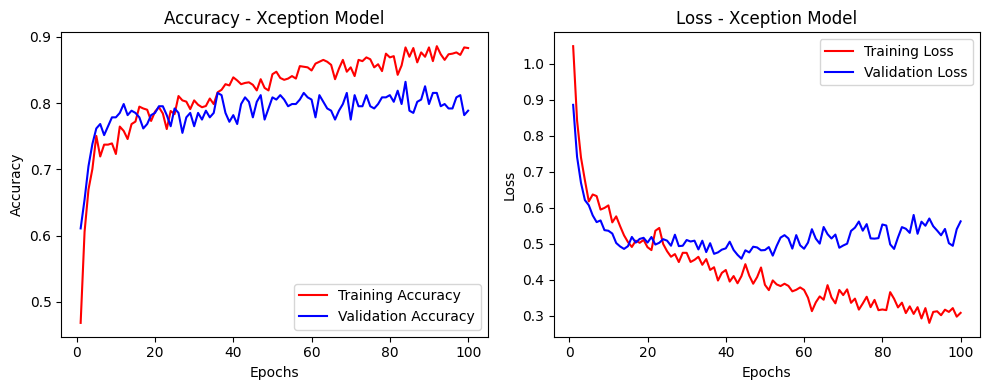

In [8]:
import matplotlib.pyplot as plt

# Ambil riwayat dari training
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)

# Plot Akurasi
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(epochs, acc, 'r', label='Training Accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation Accuracy')
plt.title('Accuracy - Xception Model')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plot Loss
plt.subplot(1, 2, 2)
plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Loss - Xception Model')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

In [9]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.metrics import confusion_matrix, classification_report
from tensorflow import keras
from tensorflow.keras.preprocessing.image import img_to_array, load_img
from tensorflow.keras.utils import to_categorical

In [10]:
def load_and_process_image(image_path, target_size=(299, 299)):
    img = load_img(image_path, target_size=target_size)
    img_array = img_to_array(img) / 255.0
    return img_array

def load_test_data(test_dir, class_names):
    data = []
    labels = []
    class_mapping = {name: idx for idx, name in enumerate(class_names)}
    for class_name in class_names:
        class_path = os.path.join(test_dir, class_name)
        if not os.path.isdir(class_path):
            print(f"Warning: Folder {class_path} not found.")
            continue
        for image_name in os.listdir(class_path):
            image_path = os.path.join(class_path, image_name)
            try:
                data.append(load_and_process_image(image_path))
                labels.append(class_mapping[class_name])
            except Exception as e:
                print(f"Error loading image {image_path}: {e}")
    return np.array(data), np.array(labels)

Error loading image Datasets/Dataset/validation/Bagus/desktop.ini: cannot identify image file <_io.BytesIO object at 0x7d1e5c308270>
Error loading image Datasets/Dataset/validation/Rusak Berat/desktop.ini: cannot identify image file <_io.BytesIO object at 0x7d1e678ee4d0>
Error loading image Datasets/Dataset/validation/Rusak Ringan/desktop.ini: cannot identify image file <_io.BytesIO object at 0x7d1e678ee4d0>


10/10 ━━━━━━━━━━━━━━━━━━━━ 26s 1s/step


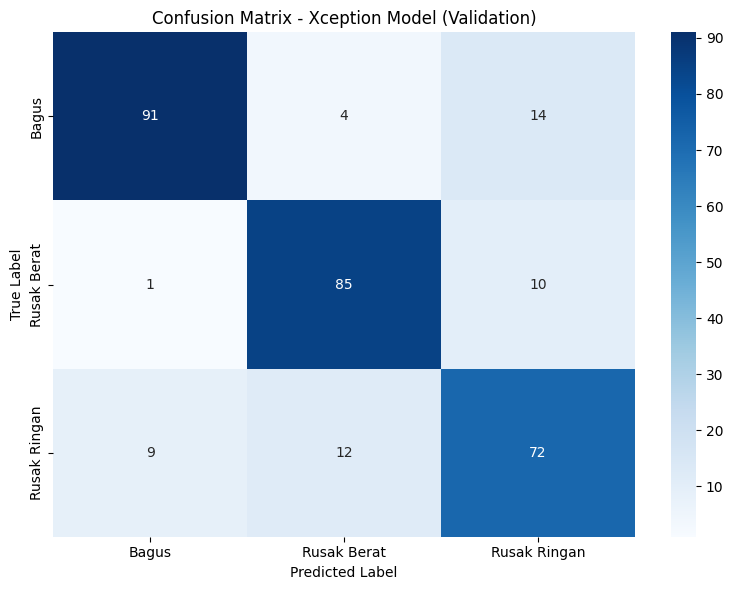


Classification Report (Validation Data):
              precision    recall  f1-score   support

       Bagus       0.90      0.83      0.87       109
 Rusak Berat       0.84      0.89      0.86        96
Rusak Ringan       0.75      0.77      0.76        93

    accuracy                           0.83       298
   macro avg       0.83      0.83      0.83       298
weighted avg       0.83      0.83      0.83       298



In [11]:
test_data_dir = val_path
class_names = sorted(os.listdir(test_data_dir))
X_test, y_test = load_test_data(test_data_dir, class_names)

model = keras.models.load_model('Xception_model.h5')

y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(to_categorical(y_test, num_classes=len(class_names)), axis=1)

conf_matrix = confusion_matrix(y_true_classes, y_pred_classes)
class_report = classification_report(y_true_classes, y_pred_classes, target_names=class_names)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix - Xception Model (Validation)')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.tight_layout()
plt.show()

print("\nClassification Report (Validation Data):")
print(class_report)

Error loading image Datasets/Dataset/train/Rusak Ringan/desktop.ini: cannot identify image file <_io.BytesIO object at 0x7d1e5c129d50>
34/34 ━━━━━━━━━━━━━━━━━━━━ 13s 393ms/step


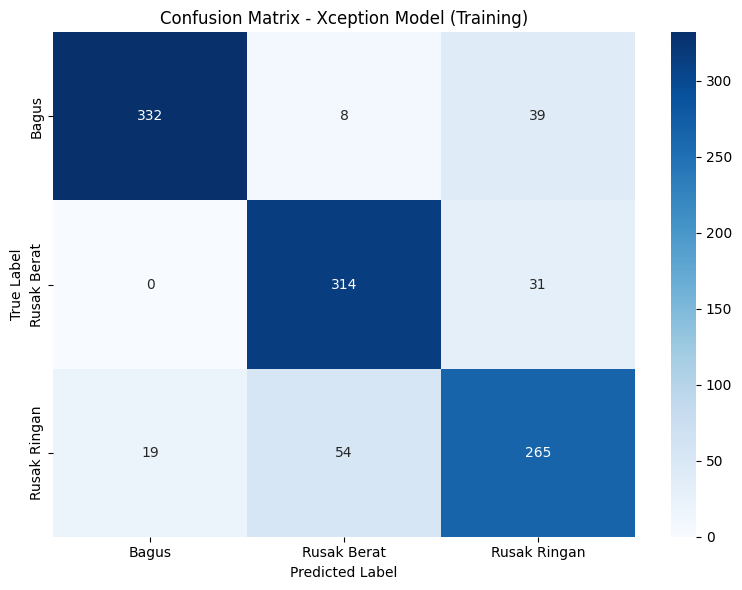


Classification Report (Training Data):
              precision    recall  f1-score   support

       Bagus       0.95      0.88      0.91       379
 Rusak Berat       0.84      0.91      0.87       345
Rusak Ringan       0.79      0.78      0.79       338

    accuracy                           0.86      1062
   macro avg       0.86      0.86      0.86      1062
weighted avg       0.86      0.86      0.86      1062



In [12]:
test_data_dir = train_path
class_names = sorted(os.listdir(test_data_dir))
X_test, y_test = load_test_data(test_data_dir, class_names)

y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(to_categorical(y_test, num_classes=len(class_names)), axis=1)

conf_matrix = confusion_matrix(y_true_classes, y_pred_classes)
class_report = classification_report(y_true_classes, y_pred_classes, target_names=class_names)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix - Xception Model (Training)')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.tight_layout()
plt.show()

print("\nClassification Report (Training Data):")
print(class_report)

Error loading image Datasets/Dataset/test/Bagus/desktop.ini: cannot identify image file <_io.BytesIO object at 0x7d1dec5c1490>
Error loading image Datasets/Dataset/test/Rusak Berat/desktop.ini: cannot identify image file <_io.BytesIO object at 0x7d1e5c180ef0>
5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 584ms/step


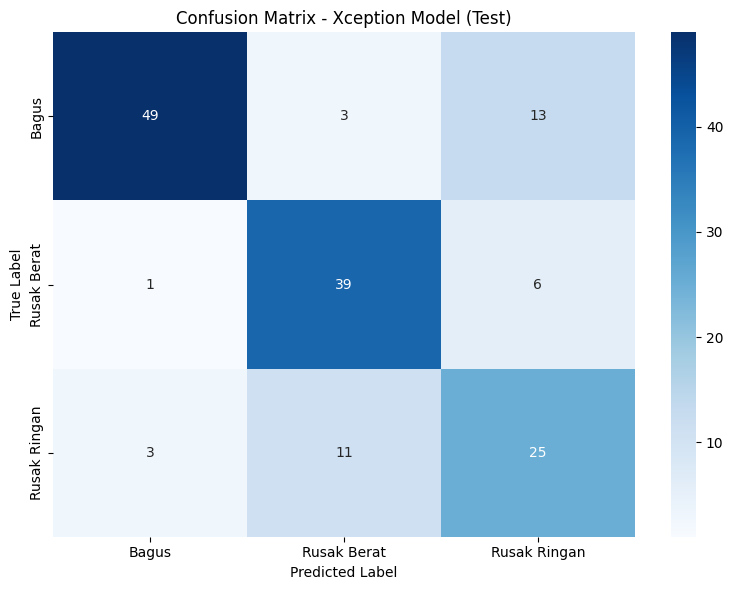


Classification Report (Test Data):
              precision    recall  f1-score   support

       Bagus       0.92      0.75      0.83        65
 Rusak Berat       0.74      0.85      0.79        46
Rusak Ringan       0.57      0.64      0.60        39

    accuracy                           0.75       150
   macro avg       0.74      0.75      0.74       150
weighted avg       0.77      0.75      0.76       150



In [13]:
test_data_dir = test_path
class_names = sorted(os.listdir(test_data_dir))
X_test, y_test = load_test_data(test_data_dir, class_names)

y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(to_categorical(y_test, num_classes=len(class_names)), axis=1)

conf_matrix = confusion_matrix(y_true_classes, y_pred_classes)
class_report = classification_report(y_true_classes, y_pred_classes, target_names=class_names)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix - Xception Model (Test)')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.tight_layout()
plt.show()

print("\nClassification Report (Test Data):")
print(class_report)